## Anggota Kelompok:

Ahmad Hasbi Salimi (20224020)

Wa Ode Aisyah (20224308)

Valeno Glenedias Widodo (20925004)

Fadlan Tri Noor Ichsan (20925006)

Melvan Safero Lee (20925007)

# Install Library dan Preparation Data

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import math
from matplotlib.lines import Line2D
from scipy.stats import zscore
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler, StandardScaler, OrdinalEncoder, LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, RocCurveDisplay, make_scorer, get_scorer_names
import lightgbm as lgb
import xgboost as xgb
import imblearn
from sklearn.inspection import DecisionBoundaryDisplay, permutation_importance
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

random_seed = 209
# Set plot style
sns.set(style="whitegrid")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from scipy.stats import pearsonr
#plt.style.use('seaborn')
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')
import matplotlib.dates as mdates1
import matplotlib.ticker as mtick
from decimal import Decimal
from scipy.stats import norm
import matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Metodologi Penelitian/StudentPerformanceFactors.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


# *Preprocessing Data*

In [ ]:
z_scores = zscore(data[['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Tutoring_Sessions','Physical_Activity','Exam_Score']])
data = data[(np.abs(z_scores) < 3).all(axis=1)]

# Metode IQR
Q1 = data[['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Tutoring_Sessions','Physical_Activity','Exam_Score']].quantile(0.25)
Q3 = data[['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Tutoring_Sessions','Physical_Activity','Exam_Score']].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data[['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Tutoring_Sessions','Physical_Activity','Exam_Score']] < (Q1 - 1.5 * IQR)) | (data[['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Tutoring_Sessions','Physical_Activity','Exam_Score']] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
data['Score_Diff'] = data['Exam_Score'] - data['Previous_Scores']

def categorize_change(x):
    if x > 0:
        return 'Improved'
    else:
        return 'Stagnan'

data['Changes'] = data['Score_Diff'].apply(categorize_change)
data = data.drop(['Score_Diff'], axis=1)

In [ ]:
data["Changes"].value_counts()

,count
Changes,
Stagnan,3984
Improved,1852


In [ ]:
categorical_cols = [col for col in data.columns if data[col].dtype == 'object' and col != 'Changes']
ordinal_encoder = OrdinalEncoder()
data[categorical_cols] = ordinal_encoder.fit_transform(data[categorical_cols])

In [ ]:
changes = ['Improved', 'Stagnan']

def encode_category(x, order):
    return order.index(x)

## Correlation Matrix

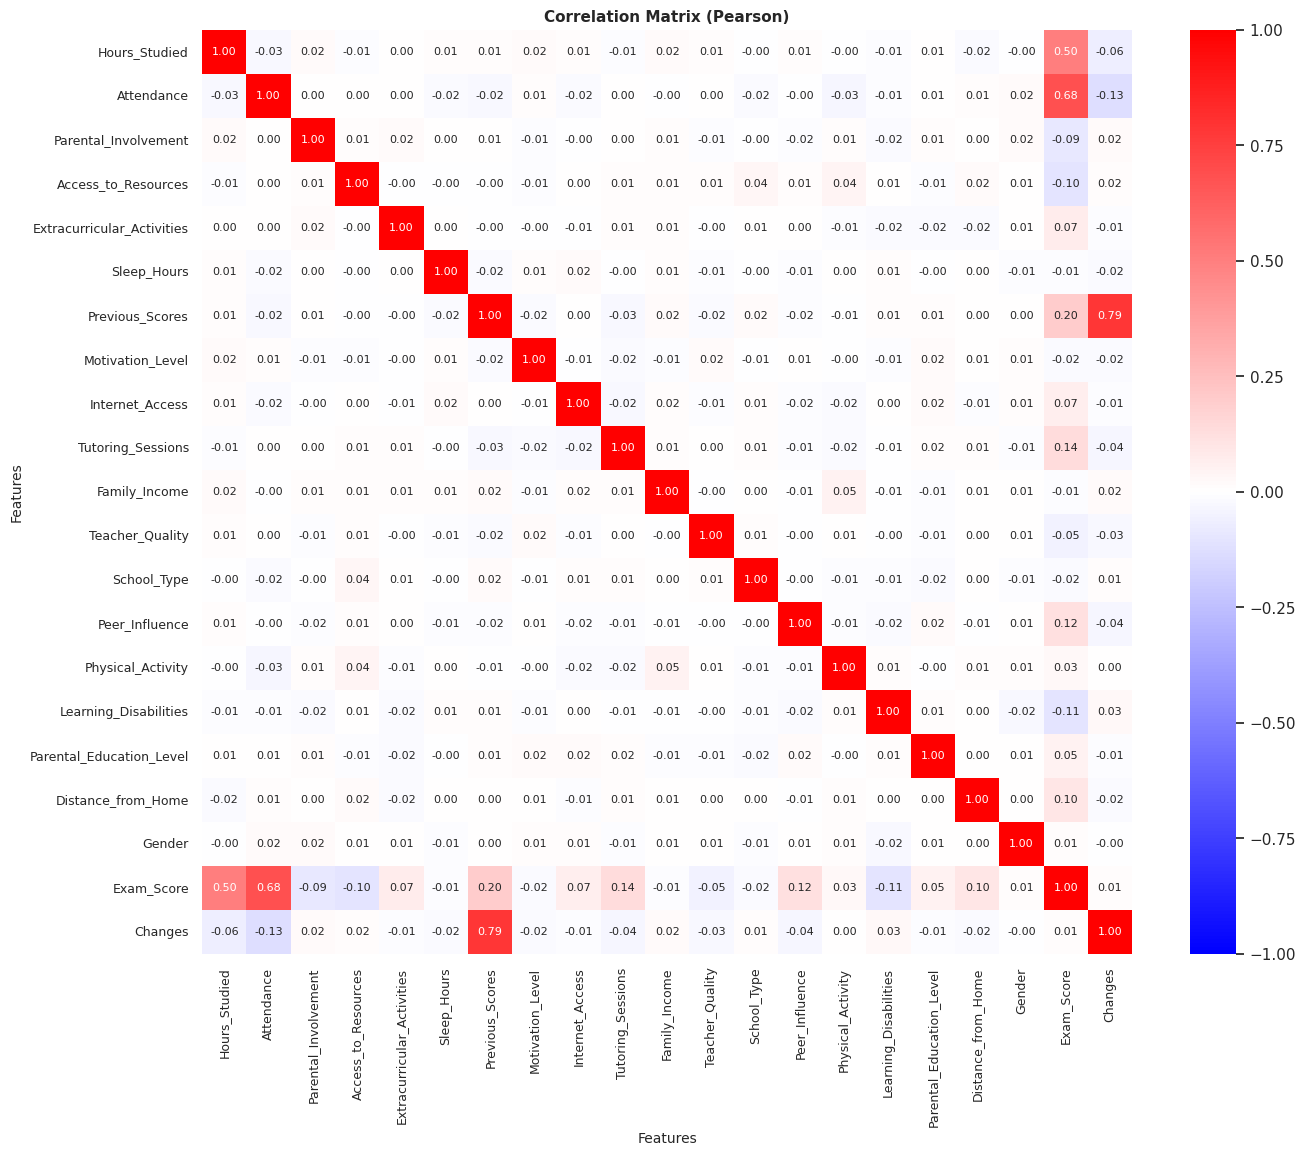

In [ ]:
data_encoded = data.copy()
data_encoded['Changes'] = data['Changes'].apply(lambda x: encode_category(x, changes))

plt.figure(figsize=(15, 12))
ax = sns.heatmap(data_encoded.corr(method='pearson'), vmin=-1, vmax=1, cmap='bwr', annot=True, fmt='.2f', annot_kws={'fontsize': 8})
ax.set_xticklabels(ax.get_xticklabels(), fontdict={'fontsize': 9})
ax.set_yticklabels(ax.get_yticklabels(), fontdict={'fontsize': 9})
plt.title('Correlation Matrix (Pearson)', fontweight='bold', fontsize='11')
plt.xlabel('Features', fontsize=10)
plt.ylabel('Features', fontsize=10)
plt.show()

## SVM Model

In [ ]:
selected_cols = ['Exam_Score', 'Attendance']
X = data[selected_cols]
y = data['Changes']
y_encoded = y.apply(lambda x: encode_category(x, changes))

ros = imblearn.over_sampling.RandomOverSampler(random_state=random_seed)
rus = imblearn.under_sampling.RandomUnderSampler(random_state=random_seed)
cc = imblearn.under_sampling.ClusterCentroids(random_state=random_seed)

X_resampled, y_resampled = cc.fit_resample(X, y)
y_resampled = y_resampled.to_numpy().reshape(-1, 1)
data_resampled = pd.DataFrame(np.hstack((X_resampled, y_resampled)), columns=X.columns.tolist()+['Changes'])

X_resampled = data_resampled.drop(['Changes'], axis=1)
y_resampled = data_resampled['Changes']
y_resampled_encoded = y_resampled.apply(lambda x: encode_category(x, changes))

In [ ]:
cols = ['Exam_Score', 'Attendance']
X = data[cols].to_numpy()
y = data['Changes']
y_encoded = y.apply(lambda x: encode_category(x, changes))

X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled_encoded, train_size=0.5, stratify=y_resampled_encoded, random_state=209)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.4, stratify=y_val, random_state=209)

standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_val_scaled = standard_scaler.transform(X_val)
X_test_scaled = standard_scaler.transform(X_test)

cs = [0.01, 0.1, 1, 10, 100]
models = {}
for c in cs:
    model = SVC(class_weight='balanced',kernel='linear', C=c,gamma='auto', random_state=random_seed)
    models[f'SVM (C={c})'] = model

def evaluate_model(models, X_train, y_train, X_val, y_val, X_test, y_test, labels):

    df = pd.DataFrame()
    for (key, model) in models.items():
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)
        y_test_pred = model.predict(X_test)

        val_accuracy = accuracy_score(y_val, y_val_pred)
        val_precision = precision_score(y_val, y_val_pred, average='macro', zero_division=0)
        val_recall = recall_score(y_val, y_val_pred, average='macro', zero_division=0)
        val_f1 = f1_score(y_val, y_val_pred, average='macro', zero_division=0)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred, average='macro', zero_division=0)
        test_recall = recall_score(y_test, y_test_pred, average='macro', zero_division=0)
        test_f1 = f1_score(y_test, y_test_pred, average='macro', zero_division=0)

        metrics = {
            'val_accuracy': val_accuracy,
            'val_precision': val_precision,
            'val_recall': val_recall,
            'val_f1': val_f1,
            'test_accuracy': test_accuracy,
            'test_precision': test_precision,
            'Test_recall': test_recall,
            'Test_f1': test_f1
        }
        model_df = pd.DataFrame(metrics, index=[key])
        df = pd.concat([df, model_df])

    df = df.round(3)
    return df

df_metrics = evaluate_model(models, X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled, y_test, changes)
df_metrics

,val_accuracy,val_precision,val_recall,val_f1,test_accuracy,test_precision,Test_recall,Test_f1
SVM (C=0.01),0.633,0.633,0.633,0.633,0.599,0.599,0.599,0.599
SVM (C=0.1),0.636,0.636,0.636,0.636,0.601,0.601,0.601,0.601
SVM (C=1),0.630,0.630,0.630,0.630,0.601,0.601,0.601,0.601
SVM (C=10),0.629,0.629,0.629,0.629,0.598,0.598,0.598,0.598
SVM (C=100),0.629,0.629,0.629,0.629,0.598,0.598,0.598,0.598


[[357 198]
 [206 350]]
              precision    recall  f1-score   support

           0       0.63      0.64      0.64       555
           1       0.64      0.63      0.63       556

    accuracy                           0.64      1111
   macro avg       0.64      0.64      0.64      1111
weighted avg       0.64      0.64      0.64      1111



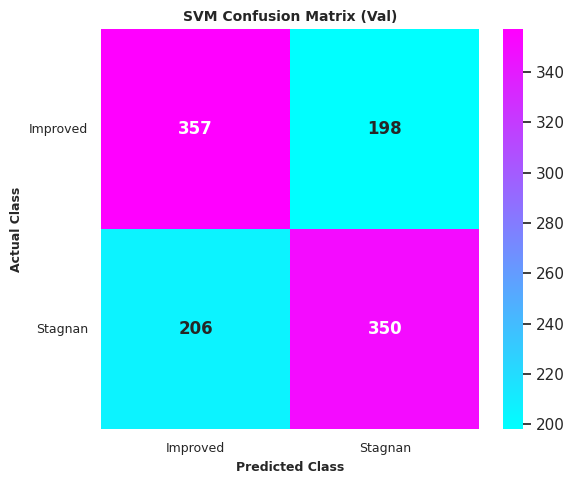


[[224 147]
 [149 221]]
              precision    recall  f1-score   support

           0       0.60      0.60      0.60       371
           1       0.60      0.60      0.60       370

    accuracy                           0.60       741
   macro avg       0.60      0.60      0.60       741
weighted avg       0.60      0.60      0.60       741



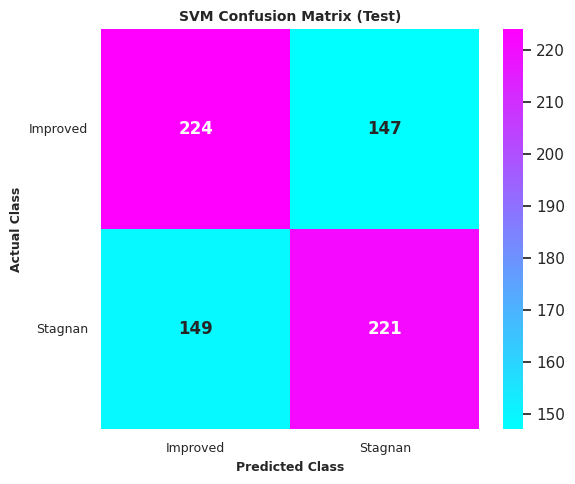

In [ ]:
def plot_confusion_matrix(cm, class_names, title):
    plt.figure(figsize=(6, 5))
    p = sns.heatmap(cm, annot=True, fmt='d', annot_kws={'fontweight':'bold'}, cmap='cool',
                    xticklabels=class_names, yticklabels=class_names)
    p.set_xticklabels(p.get_xticklabels(), rotation=0, fontsize=9)
    p.set_yticklabels(p.get_yticklabels(), rotation=0, fontsize=9)
    plt.xlabel('Predicted Class', fontweight='bold', fontsize=9)
    plt.ylabel('Actual Class', fontweight='bold', fontsize=9)
    plt.title(title, fontweight='bold', fontsize=10)
    plt.tight_layout()
    plt.show()

model = SVC(class_weight='balanced',kernel='linear', C=0.1,gamma='auto', random_state=random_seed)
model.fit(X_train_scaled, y_train)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
cm_val = confusion_matrix(y_val, y_val_pred)
plot_confusion_matrix(cm_val, changes, 'SVM Confusion Matrix (Val)')
print()
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
cm_test = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm_test, changes, 'SVM Confusion Matrix (Test)')

In [ ]:
X = data.drop('Changes', axis=1)
y = data['Changes']
y_encoded = y.apply(lambda x: encode_category(x, changes))

ros = imblearn.over_sampling.RandomOverSampler(random_state=random_seed)
rus = imblearn.under_sampling.RandomUnderSampler(random_state=random_seed)
cc = imblearn.under_sampling.ClusterCentroids(random_state=random_seed)

X_resampled, y_resampled = cc.fit_resample(X, y)
y_resampled = y_resampled.to_numpy().reshape(-1, 1)
data_resampled = pd.DataFrame(np.hstack((X_resampled, y_resampled)), columns=X.columns.tolist()+['Changes'])

X_resampled = data_resampled.drop(['Changes'], axis=1)
y_resampled = data_resampled['Changes']
y_resampled_encoded = y_resampled.apply(lambda x: encode_category(x, changes))

X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled_encoded, train_size=0.5, stratify=y_resampled_encoded, random_state=209)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.4, stratify=y_val, random_state=209)

standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_val_scaled = standard_scaler.transform(X_val)
X_test_scaled = standard_scaler.transform(X_test)

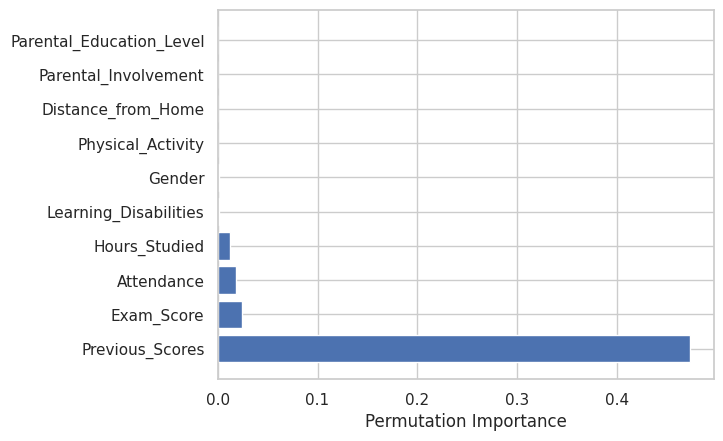

In [ ]:
from sklearn.inspection import permutation_importance
model = SVC(class_weight='balanced',kernel='linear', C=0.1,gamma='auto', random_state=random_seed)
model.fit(X_train_scaled, y_train)
r = permutation_importance(
    model,
    X_val_scaled,
    y_val,
    n_repeats=10,
    random_state=209,
    scoring='f1_macro'
)

idx = r.importances_mean.argsort()[::-1]
idx = idx[:10]
plt.barh(range(len(idx)), r.importances_mean[idx])
plt.yticks(range(len(idx)), X_val.columns[idx])
plt.xlabel("Permutation Importance")
plt.show()

## XGBoost

In [ ]:
selected_cols = ['Exam_Score', 'Attendance']
X = data[selected_cols]
y = data['Changes']
y_encoded = y.apply(lambda x: encode_category(x, changes))

ros = imblearn.over_sampling.RandomOverSampler(random_state=random_seed)
rus = imblearn.under_sampling.RandomUnderSampler(random_state=random_seed)
cc = imblearn.under_sampling.ClusterCentroids(random_state=random_seed)

X_resampled, y_resampled = cc.fit_resample(X, y)
y_resampled = y_resampled.to_numpy().reshape(-1, 1)
data_resampled = pd.DataFrame(np.hstack((X_resampled, y_resampled)), columns=X.columns.tolist()+['Changes'])

X_resampled = data_resampled.drop(['Changes'], axis=1)
y_resampled = data_resampled['Changes']
y_resampled_encoded = y_resampled.apply(lambda x: encode_category(x, changes))

In [ ]:
cols = ['Exam_Score', 'Attendance']
X = data[cols].to_numpy()
y = data['Changes']
y_encoded = y.apply(lambda x: encode_category(x, changes))

X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled_encoded, train_size=0.5, stratify=y_resampled_encoded, random_state=209)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.4, stratify=y_val, random_state=209)

standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_val_scaled = standard_scaler.transform(X_val)
X_test_scaled = standard_scaler.transform(X_test)

learning_rates = [0.01, 0.1, 0.3]
n_estimators_list = [50, 100, 200]
max_depths = [3, 5, 7]

models = {}
for lr in learning_rates:
    for n_est in n_estimators_list:
        for depth in max_depths:
            model = xgb.XGBClassifier(
                learning_rate=lr,
                n_estimators=n_est,
                max_depth=depth,
                random_state=random_seed,
                use_label_encoder=False,
                eval_metric='mlogloss'  # for multi-class classification
            )
            models[f'XGB (lr={lr}, n={n_est}, depth={depth})'] = model

def evaluate_model(models, X_train, y_train, X_val, y_val, X_test, y_test, labels):

    df = pd.DataFrame()
    for (key, model) in models.items():
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)
        y_test_pred = model.predict(X_test)

        val_accuracy = accuracy_score(y_val, y_val_pred)
        val_precision = precision_score(y_val, y_val_pred, average='macro', zero_division=0)
        val_recall = recall_score(y_val, y_val_pred, average='macro', zero_division=0)
        val_f1 = f1_score(y_val, y_val_pred, average='macro', zero_division=0)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred, average='macro', zero_division=0)
        test_recall = recall_score(y_test, y_test_pred, average='macro', zero_division=0)
        test_f1 = f1_score(y_test, y_test_pred, average='macro', zero_division=0)

        metrics = {
            'val_accuracy': val_accuracy,
            'val_precision': val_precision,
            'val_recall': val_recall,
            'val_f1': val_f1,
            'test_accuracy': test_accuracy,
            'test_precision': test_precision,
            'Test_recall': test_recall,
            'Test_f1': test_f1
        }
        model_df = pd.DataFrame(metrics, index=[key])
        df = pd.concat([df, model_df])

    df = df.round(3)
    return df

df_metrics = evaluate_model(models, X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled, y_test, changes)
df_metrics

,val_accuracy,val_precision,val_recall,val_f1,test_accuracy,test_precision,Test_recall,Test_f1
"XGB (lr=0.01, n=50, depth=3)",0.670,0.670,0.670,0.670,0.634,0.634,0.634,0.634
"XGB (lr=0.01, n=50, depth=5)",0.688,0.688,0.688,0.688,0.668,0.668,0.668,0.668
"XGB (lr=0.01, n=50, depth=7)",0.683,0.685,0.683,0.682,0.672,0.673,0.672,0.672
"XGB (lr=0.01, n=100, depth=3)",0.666,0.666,0.666,0.666,0.629,0.629,0.629,0.629
"XGB (lr=0.01, n=100, depth=5)",0.689,0.689,0.689,0.689,0.673,0.673,0.673,0.673
"XGB (lr=0.01, n=100, depth=7)",0.689,0.691,0.689,0.688,0.671,0.673,0.671,0.670
"XGB (lr=0.01, n=200, depth=3)",0.668,0.668,0.668,0.668,0.630,0.630,0.630,0.630
"XGB (lr=0.01, n=200, depth=5)",0.690,0.690,0.690,0.690,0.669,0.669,0.669,0.669
"XGB (lr=0.01, n=200, depth=7)",0.687,0.688,0.687,0.686,0.668,0.669,0.668,0.668
"XGB (lr=0.1, n=50, depth=3)",0.699,0.699,0.699,0.699,0.665,0.665,0.665,0.665


[[361 194]
 [137 419]]
              precision    recall  f1-score   support

           0       0.72      0.65      0.69       555
           1       0.68      0.75      0.72       556

    accuracy                           0.70      1111
   macro avg       0.70      0.70      0.70      1111
weighted avg       0.70      0.70      0.70      1111



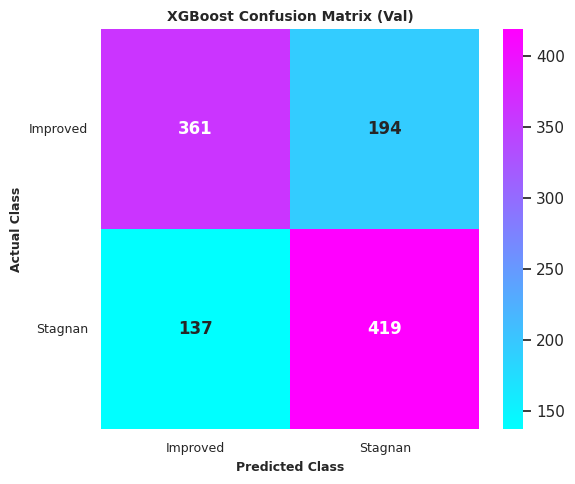


[[236 135]
 [102 268]]
              precision    recall  f1-score   support

           0       0.70      0.64      0.67       371
           1       0.67      0.72      0.69       370

    accuracy                           0.68       741
   macro avg       0.68      0.68      0.68       741
weighted avg       0.68      0.68      0.68       741



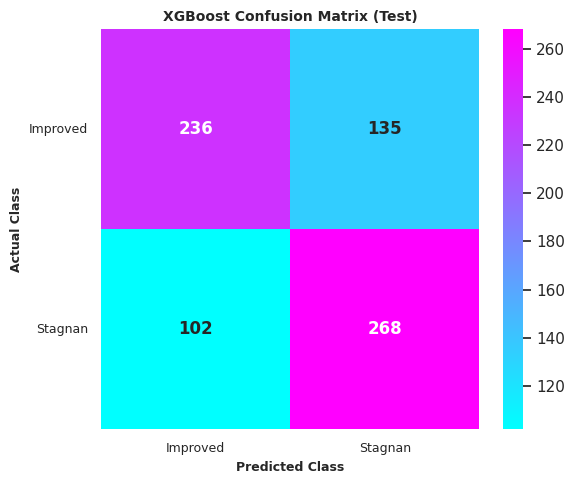

In [ ]:
def plot_confusion_matrix(cm, class_names, title):
    plt.figure(figsize=(6, 5))
    p = sns.heatmap(cm, annot=True, fmt='d', annot_kws={'fontweight':'bold'}, cmap='cool',
                    xticklabels=class_names, yticklabels=class_names)
    p.set_xticklabels(p.get_xticklabels(), rotation=0, fontsize=9)
    p.set_yticklabels(p.get_yticklabels(), rotation=0, fontsize=9)
    plt.xlabel('Predicted Class', fontweight='bold', fontsize=9)
    plt.ylabel('Actual Class', fontweight='bold', fontsize=9)
    plt.title(title, fontweight='bold', fontsize=10)
    plt.tight_layout()
    plt.show()

model = xgb.XGBClassifier(
                learning_rate=0.1,
                n_estimators=50,
                max_depth=7,
                random_state=random_seed,
                use_label_encoder=False,
                eval_metric='mlogloss'  # for multi-class classification
            )
model.fit(X_train_scaled, y_train)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
cm_val = confusion_matrix(y_val, y_val_pred)
plot_confusion_matrix(cm_val, changes, 'XGBoost Confusion Matrix (Val)')
print()
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
cm_test = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm_test, changes, 'XGBoost Confusion Matrix (Test)')

In [ ]:
X = data.drop('Changes', axis=1)
y = data['Changes']
y_encoded = y.apply(lambda x: encode_category(x, changes))

ros = imblearn.over_sampling.RandomOverSampler(random_state=random_seed)
rus = imblearn.under_sampling.RandomUnderSampler(random_state=random_seed)
cc = imblearn.under_sampling.ClusterCentroids(random_state=random_seed)

X_resampled, y_resampled = cc.fit_resample(X, y)
y_resampled = y_resampled.to_numpy().reshape(-1, 1)
data_resampled = pd.DataFrame(np.hstack((X_resampled, y_resampled)), columns=X.columns.tolist()+['Changes'])

X_resampled = data_resampled.drop(['Changes'], axis=1)
y_resampled = data_resampled['Changes']
y_resampled_encoded = y_resampled.apply(lambda x: encode_category(x, changes))

X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled_encoded, train_size=0.5, stratify=y_resampled_encoded, random_state=209)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.4, stratify=y_val, random_state=209)

standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_val_scaled = standard_scaler.transform(X_val)
X_test_scaled = standard_scaler.transform(X_test)

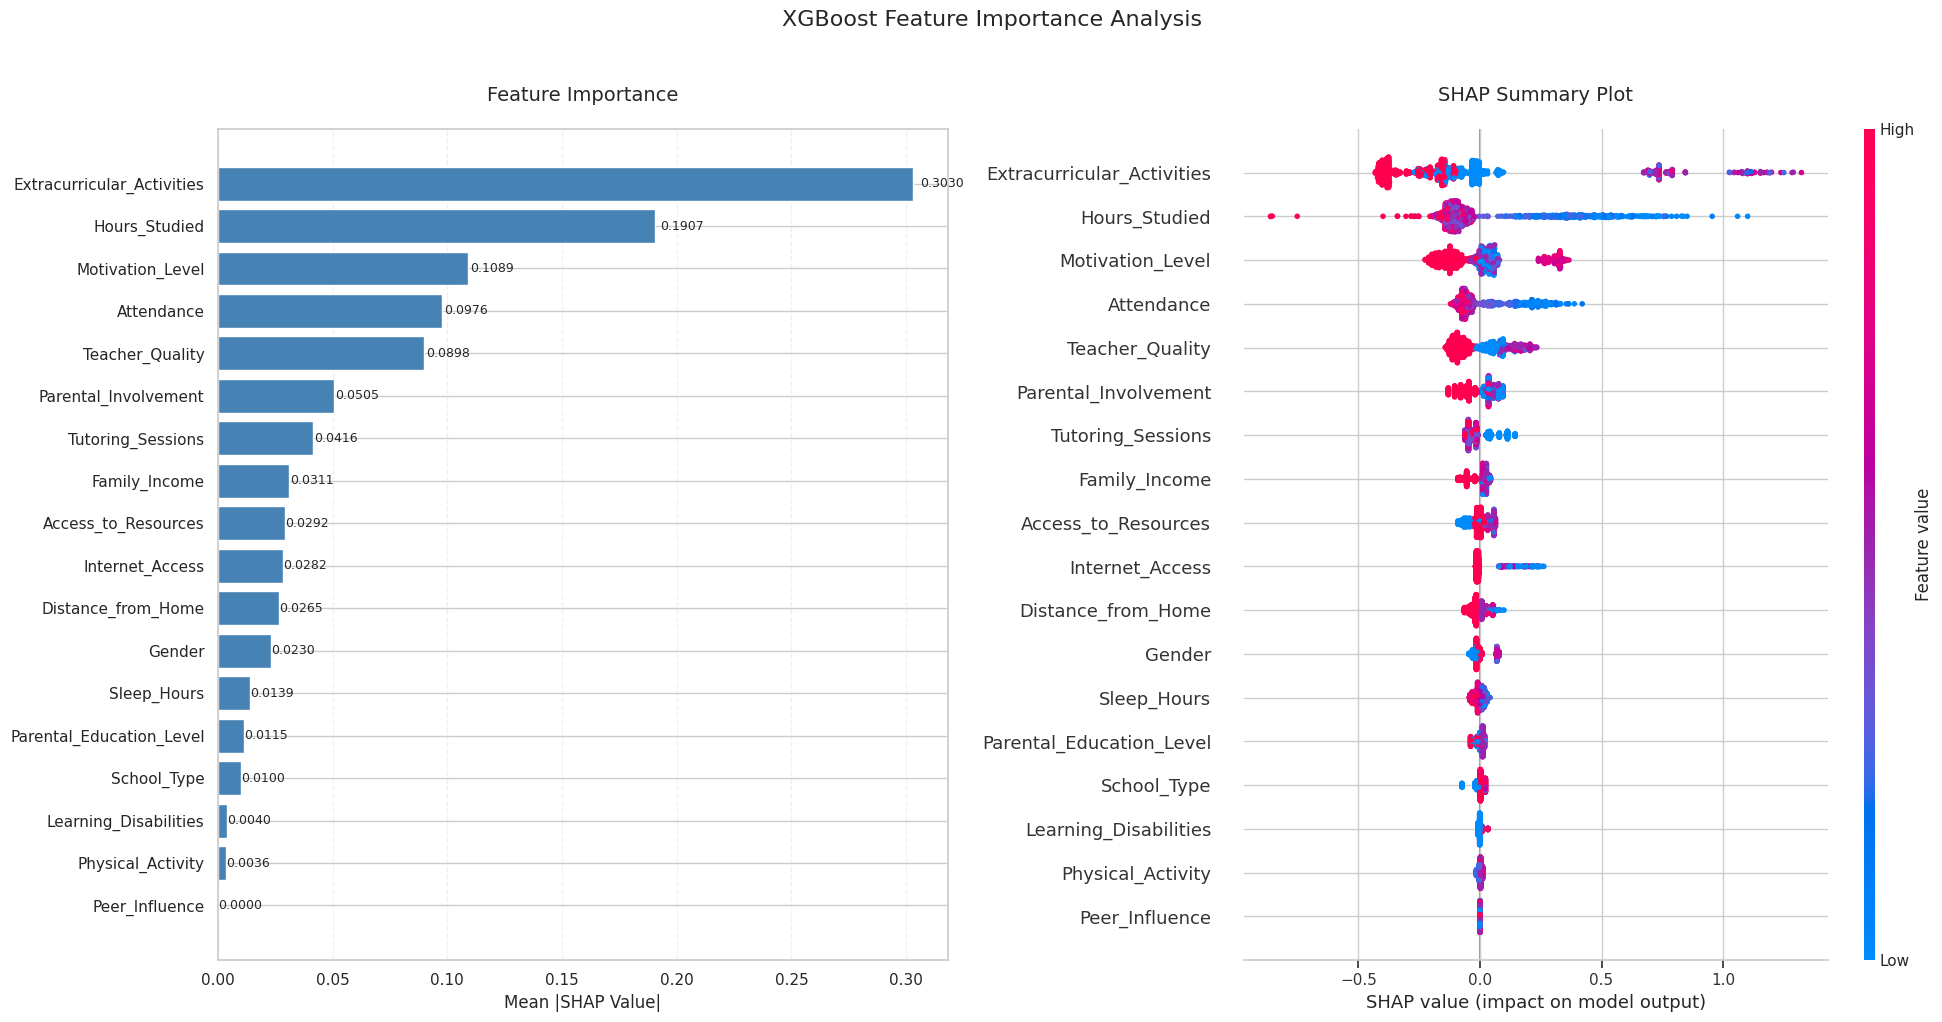

In [ ]:
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
import numpy as np

# 1. Train XGBoost model
xgb_model = xgb.XGBClassifier(
    random_state=random_seed,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train_scaled, y_train)

# 2. Calculate SHAP values
explainer = shap.Explainer(xgb_model, X_train_scaled)
shap_values = explainer(X_val_scaled)

# 3. Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# 3.1 Feature Importance Bar Plot (left)
mean_abs_shap = np.abs(shap_values.values).mean(axis=0)

# Create mask to exclude specific features
features_to_exclude = ['Previous_Scores', 'Exam_Score']
feature_names = X_val.columns.tolist()

# Get indices of features to keep (exclude the specified ones)
keep_indices = [i for i, feature in enumerate(feature_names) if feature not in features_to_exclude]
keep_features = [feature_names[i] for i in keep_indices]
keep_shap_values = mean_abs_shap[keep_indices]

# Sort the remaining features
sorted_idx = np.argsort(keep_shap_values)

# Plot horizontal bar chart
n_features = len(keep_shap_values)
bars = ax1.barh(range(n_features), keep_shap_values[sorted_idx], color='steelblue')

# Add value labels
for i, (bar, value) in enumerate(zip(bars, keep_shap_values[sorted_idx])):
    ax1.text(bar.get_width() + bar.get_width()*0.01,
             bar.get_y() + bar.get_height()/2,
             f'{value:.4f}',
             va='center',
             fontsize=9)

ax1.set_yticks(range(n_features))
ax1.set_yticklabels(np.array(keep_features)[sorted_idx])
ax1.set_xlabel('Mean |SHAP Value|', fontsize=12)
ax1.set_title(f'Feature Importance', fontsize=14, pad=20)
ax1.grid(axis='x', alpha=0.3, linestyle='--')

# 3.2 SHAP Summary Plot (right) - also exclude the same features
# Create filtered data
X_val_filtered = X_val_scaled[:, keep_indices]

# Filter SHAP values
if len(shap_values.shape) == 2:
    shap_values_filtered = shap_values.values[:, keep_indices]
else:
    # Handle multi-class case
    shap_values_filtered = shap_values.values[:, :, keep_indices]

shap.summary_plot(shap_values_filtered, X_val_filtered,
                  feature_names=keep_features,
                  show=False,
                  plot_size=None,
                  max_display=n_features)

ax2.set_title(f'SHAP Summary Plot', fontsize=14, pad=20)

plt.suptitle('XGBoost Feature Importance Analysis', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## Logistic Regression

In [ ]:
selected_cols = ['Exam_Score', 'Attendance']
X = data[selected_cols]
y = data['Changes']
y_encoded = y.apply(lambda x: encode_category(x, changes))

ros = imblearn.over_sampling.RandomOverSampler(random_state=random_seed)
rus = imblearn.under_sampling.RandomUnderSampler(random_state=random_seed)
cc = imblearn.under_sampling.ClusterCentroids(random_state=random_seed)

X_resampled, y_resampled = cc.fit_resample(X, y)
y_resampled = y_resampled.to_numpy().reshape(-1, 1)
data_resampled = pd.DataFrame(np.hstack((X_resampled, y_resampled)), columns=X.columns.tolist()+['Changes'])

X_resampled = data_resampled.drop(['Changes'], axis=1)
y_resampled = data_resampled['Changes']
y_resampled_encoded = y_resampled.apply(lambda x: encode_category(x, changes))

In [ ]:
cols = ['Exam_Score', 'Attendance']
X = data[cols].to_numpy()
y = data['Changes']
y_encoded = y.apply(lambda x: encode_category(x, changes))

X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled_encoded, train_size=0.5, stratify=y_resampled_encoded, random_state=209)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.4, stratify=y_val, random_state=209)

standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_val_scaled = standard_scaler.transform(X_val)
X_test_scaled = standard_scaler.transform(X_test)

Cs = [0.01, 0.1, 1, 10, 100]
models = {}
for c in Cs:
    model = LogisticRegression(
        C=c,
        max_iter=1000,
        random_state=random_seed,
        class_weight='balanced',
        multi_class='multinomial'  # Explicitly specify for multi-class
    )
    models[f'LR (C={c})'] = model

def evaluate_model(models, X_train, y_train, X_val, y_val, X_test, y_test, labels):

    df = pd.DataFrame()
    for (key, model) in models.items():
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)
        y_test_pred = model.predict(X_test)

        val_accuracy = accuracy_score(y_val, y_val_pred)
        val_precision = precision_score(y_val, y_val_pred, average='macro', zero_division=0)
        val_recall = recall_score(y_val, y_val_pred, average='macro', zero_division=0)
        val_f1 = f1_score(y_val, y_val_pred, average='macro', zero_division=0)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred, average='macro', zero_division=0)
        test_recall = recall_score(y_test, y_test_pred, average='macro', zero_division=0)
        test_f1 = f1_score(y_test, y_test_pred, average='macro', zero_division=0)

        metrics = {
            'val_accuracy': val_accuracy,
            'val_precision': val_precision,
            'val_recall': val_recall,
            'val_f1': val_f1,
            'test_accuracy': test_accuracy,
            'test_precision': test_precision,
            'Test_recall': test_recall,
            'Test_f1': test_f1
        }
        model_df = pd.DataFrame(metrics, index=[key])
        df = pd.concat([df, model_df])

    df = df.round(3)
    return df

df_metrics = evaluate_model(models, X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled, y_test, changes)
df_metrics

,val_accuracy,val_precision,val_recall,val_f1,test_accuracy,test_precision,Test_recall,Test_f1
LR (C=0.01),0.629,0.629,0.629,0.629,0.596,0.597,0.597,0.596
LR (C=0.1),0.624,0.624,0.624,0.624,0.588,0.588,0.588,0.588
LR (C=1),0.626,0.626,0.626,0.626,0.588,0.588,0.588,0.588
LR (C=10),0.626,0.626,0.626,0.626,0.588,0.588,0.588,0.588
LR (C=100),0.626,0.626,0.626,0.626,0.588,0.588,0.588,0.588


[[344 211]
 [201 355]]
              precision    recall  f1-score   support

           0       0.63      0.62      0.63       555
           1       0.63      0.64      0.63       556

    accuracy                           0.63      1111
   macro avg       0.63      0.63      0.63      1111
weighted avg       0.63      0.63      0.63      1111



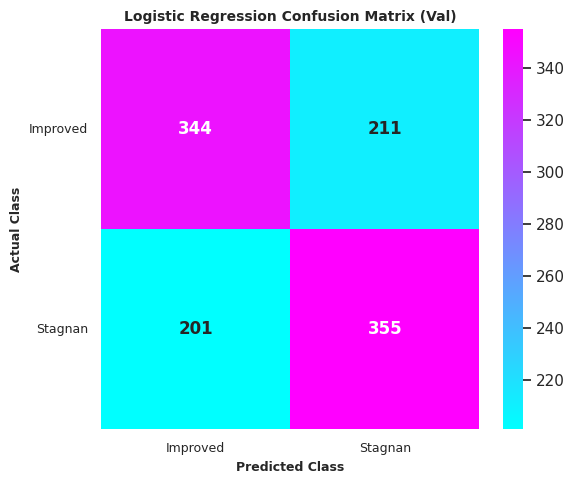


[[218 153]
 [146 224]]
              precision    recall  f1-score   support

           0       0.60      0.59      0.59       371
           1       0.59      0.61      0.60       370

    accuracy                           0.60       741
   macro avg       0.60      0.60      0.60       741
weighted avg       0.60      0.60      0.60       741



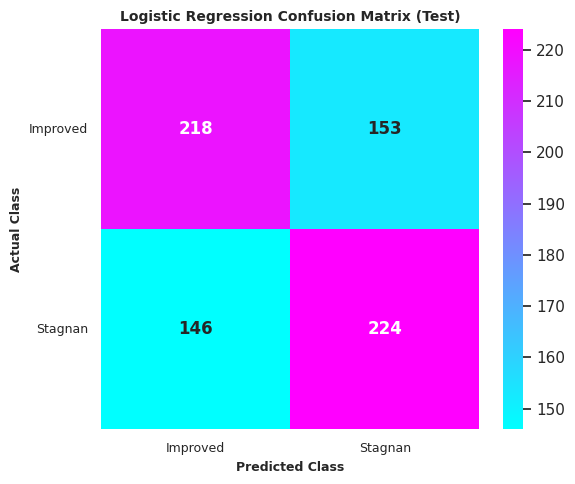

In [ ]:
def plot_confusion_matrix(cm, class_names, title):
    plt.figure(figsize=(6, 5))
    p = sns.heatmap(cm, annot=True, fmt='d', annot_kws={'fontweight':'bold'}, cmap='cool',
                    xticklabels=class_names, yticklabels=class_names)
    p.set_xticklabels(p.get_xticklabels(), rotation=0, fontsize=9)
    p.set_yticklabels(p.get_yticklabels(), rotation=0, fontsize=9)
    plt.xlabel('Predicted Class', fontweight='bold', fontsize=9)
    plt.ylabel('Actual Class', fontweight='bold', fontsize=9)
    plt.title(title, fontweight='bold', fontsize=10)
    plt.tight_layout()
    plt.show()

model = LogisticRegression(
        C=0.01,
        max_iter=1000,
        random_state=random_seed,
        class_weight='balanced',
        multi_class='multinomial'  # Explicitly specify for multi-class
    )
model.fit(X_train_scaled, y_train)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
cm_val = confusion_matrix(y_val, y_val_pred)
plot_confusion_matrix(cm_val, changes, 'Logistic Regression Confusion Matrix (Val)')
print()
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
cm_test = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm_test, changes, 'Logistic Regression Confusion Matrix (Test)')

In [ ]:
X = data.drop('Changes', axis=1)
y = data['Changes']
y_encoded = y.apply(lambda x: encode_category(x, changes))

ros = imblearn.over_sampling.RandomOverSampler(random_state=random_seed)
rus = imblearn.under_sampling.RandomUnderSampler(random_state=random_seed)
cc = imblearn.under_sampling.ClusterCentroids(random_state=random_seed)

X_resampled, y_resampled = cc.fit_resample(X, y)
y_resampled = y_resampled.to_numpy().reshape(-1, 1)
data_resampled = pd.DataFrame(np.hstack((X_resampled, y_resampled)), columns=X.columns.tolist()+['Changes'])

X_resampled = data_resampled.drop(['Changes'], axis=1)
y_resampled = data_resampled['Changes']
y_resampled_encoded = y_resampled.apply(lambda x: encode_category(x, changes))

X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled_encoded, train_size=0.5, stratify=y_resampled_encoded, random_state=209)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.4, stratify=y_val, random_state=209)

standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_val_scaled = standard_scaler.transform(X_val)
X_test_scaled = standard_scaler.transform(X_test)

## CatBoost

In [ ]:
selected_cols = ['Exam_Score', 'Attendance']
X = data[selected_cols]
y = data['Changes']
y_encoded = y.apply(lambda x: encode_category(x, changes))

ros = imblearn.over_sampling.RandomOverSampler(random_state=random_seed)
rus = imblearn.under_sampling.RandomUnderSampler(random_state=random_seed)
cc = imblearn.under_sampling.ClusterCentroids(random_state=random_seed)

X_resampled, y_resampled = cc.fit_resample(X, y)
y_resampled = y_resampled.to_numpy().reshape(-1, 1)
data_resampled = pd.DataFrame(np.hstack((X_resampled, y_resampled)), columns=X.columns.tolist()+['Changes'])

X_resampled = data_resampled.drop(['Changes'], axis=1)
y_resampled = data_resampled['Changes']
y_resampled_encoded = y_resampled.apply(lambda x: encode_category(x, changes))

In [ ]:
cols = ['Exam_Score', 'Attendance']
X = data[cols].to_numpy()
y = data['Changes']
y_encoded = y.apply(lambda x: encode_category(x, changes))

X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled_encoded, train_size=0.5, stratify=y_resampled_encoded, random_state=209)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.4, stratify=y_val, random_state=209)

standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_val_scaled = standard_scaler.transform(X_val)
X_test_scaled = standard_scaler.transform(X_test)

# learning_rates = [0.01, 0.05, 0.1]
learning_rates = [0.1]
depths = [4, 6, 8]
iterations_list = [100, 200, 500]
l2_leaf_regs = [1, 3, 5, 10]  # L2 regularization

models = {}
for lr in learning_rates:
    for depth in depths:
        for iterations in iterations_list:
            for l2_reg in l2_leaf_regs:
                model = CatBoostClassifier(
                    learning_rate=lr,
                    depth=depth,
                    iterations=iterations,
                    l2_leaf_reg=l2_reg,
                    random_seed=random_seed,
                    verbose=False,  # Set to True to see training progress
                    task_type='CPU',  # Use 'GPU' if available
                    loss_function='MultiClass',  # For 3-class classification
                    auto_class_weights='Balanced'  # Handle class imbalance
                )
                models[f'CatBoost (lr={lr}, depth={depth}, iter={iterations}, l2={l2_reg})'] = model

def evaluate_model(models, X_train, y_train, X_val, y_val, X_test, y_test, labels):

    df = pd.DataFrame()
    for (key, model) in models.items():
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)
        y_test_pred = model.predict(X_test)

        val_accuracy = accuracy_score(y_val, y_val_pred)
        val_precision = precision_score(y_val, y_val_pred, average='macro', zero_division=0)
        val_recall = recall_score(y_val, y_val_pred, average='macro', zero_division=0)
        val_f1 = f1_score(y_val, y_val_pred, average='macro', zero_division=0)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred, average='macro', zero_division=0)
        test_recall = recall_score(y_test, y_test_pred, average='macro', zero_division=0)
        test_f1 = f1_score(y_test, y_test_pred, average='macro', zero_division=0)

        metrics = {
            'val_accuracy': val_accuracy,
            'val_precision': val_precision,
            'val_recall': val_recall,
            'val_f1': val_f1,
            'test_accuracy': test_accuracy,
            'test_precision': test_precision,
            'Test_recall': test_recall,
            'Test_f1': test_f1
        }
        model_df = pd.DataFrame(metrics, index=[key])
        df = pd.concat([df, model_df])

    df = df.round(3)
    return df

df_metrics = evaluate_model(models, X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled, y_test, changes)
df_metrics

,val_accuracy,val_precision,val_recall,val_f1,test_accuracy,test_precision,Test_recall,Test_f1
"CatBoost (lr=0.1, depth=4, iter=100, l2=1)",0.696,0.696,0.696,0.696,0.682,0.682,0.682,0.681
"CatBoost (lr=0.1, depth=4, iter=100, l2=3)",0.694,0.697,0.694,0.693,0.671,0.673,0.671,0.669
"CatBoost (lr=0.1, depth=4, iter=100, l2=5)",0.691,0.693,0.691,0.691,0.667,0.668,0.667,0.666
"CatBoost (lr=0.1, depth=4, iter=100, l2=10)",0.694,0.696,0.694,0.693,0.680,0.681,0.680,0.680
"CatBoost (lr=0.1, depth=4, iter=200, l2=1)",0.703,0.706,0.703,0.702,0.691,0.692,0.691,0.690
"CatBoost (lr=0.1, depth=4, iter=200, l2=3)",0.701,0.705,0.701,0.700,0.683,0.685,0.683,0.682
"CatBoost (lr=0.1, depth=4, iter=200, l2=5)",0.704,0.707,0.704,0.703,0.677,0.679,0.678,0.677
"CatBoost (lr=0.1, depth=4, iter=200, l2=10)",0.708,0.710,0.708,0.708,0.683,0.684,0.683,0.682
"CatBoost (lr=0.1, depth=4, iter=500, l2=1)",0.695,0.697,0.695,0.694,0.672,0.672,0.672,0.672
"CatBoost (lr=0.1, depth=4, iter=500, l2=3)",0.691,0.693,0.691,0.691,0.679,0.679,0.679,0.679


[[370 185]
 [135 421]]
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       555
           1       0.69      0.76      0.72       556

    accuracy                           0.71      1111
   macro avg       0.71      0.71      0.71      1111
weighted avg       0.71      0.71      0.71      1111



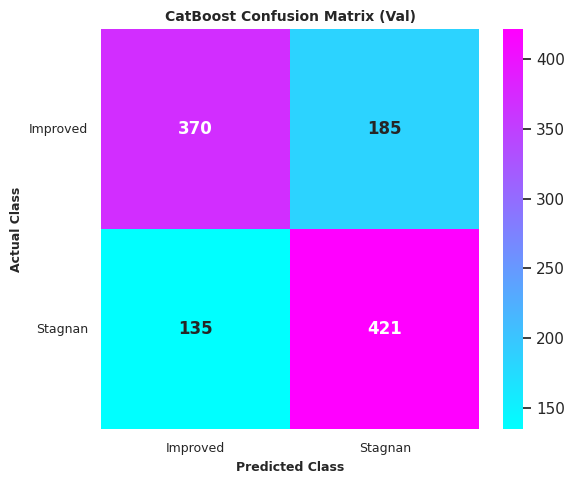


[[238 133]
 [ 97 273]]
              precision    recall  f1-score   support

           0       0.71      0.64      0.67       371
           1       0.67      0.74      0.70       370

    accuracy                           0.69       741
   macro avg       0.69      0.69      0.69       741
weighted avg       0.69      0.69      0.69       741



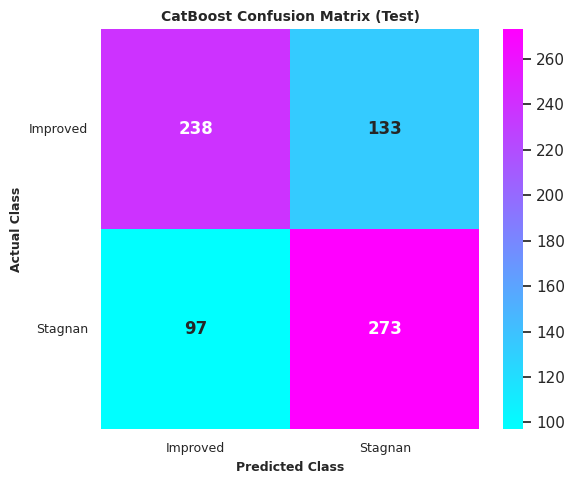

In [ ]:
def plot_confusion_matrix(cm, class_names, title):
    plt.figure(figsize=(6, 5))
    p = sns.heatmap(cm, annot=True, fmt='d', annot_kws={'fontweight':'bold'}, cmap='cool',
                    xticklabels=class_names, yticklabels=class_names)
    p.set_xticklabels(p.get_xticklabels(), rotation=0, fontsize=9)
    p.set_yticklabels(p.get_yticklabels(), rotation=0, fontsize=9)
    plt.xlabel('Predicted Class', fontweight='bold', fontsize=9)
    plt.ylabel('Actual Class', fontweight='bold', fontsize=9)
    plt.title(title, fontweight='bold', fontsize=10)
    plt.tight_layout()
    plt.show()

model = CatBoostClassifier(
                    learning_rate=0.1,
                    depth=8,
                    iterations=100,
                    l2_leaf_reg=3,
                    random_seed=random_seed,
                    verbose=False,  # Set to True to see training progress
                    task_type='CPU',  # Use 'GPU' if available
                    loss_function='MultiClass',  # For 3-class classification
                    auto_class_weights='Balanced'  # Handle class imbalance
                )
model.fit(X_train_scaled, y_train)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
cm_val = confusion_matrix(y_val, y_val_pred)
plot_confusion_matrix(cm_val, changes, 'CatBoost Confusion Matrix (Val)')
print()
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
cm_test = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm_test, changes, 'CatBoost Confusion Matrix (Test)')